In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c8bad588-cf92-4c8a-0832-ff45b04a3d9a)


In [3]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-14 06:45:33--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_     [ <=>                ]   1.08M  --.-KB/s    in 0.04s   

2023-06-14 06:45:34 (24.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [1134780]



In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [5]:
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
len(df)

2787

In [8]:
bitcoin_prices  = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})

In [9]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


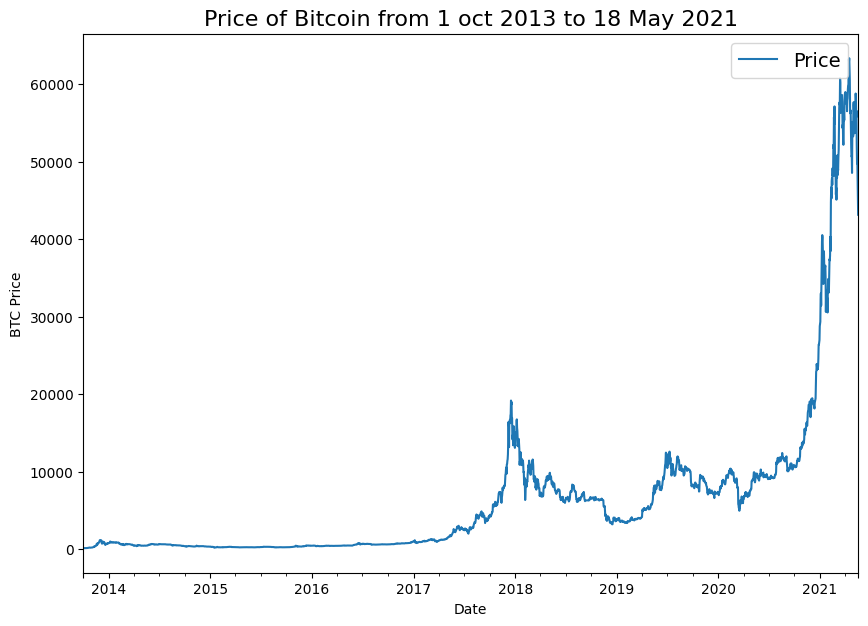

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [11]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/drive/MyDrive/Colab Notebooks/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] ,"%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

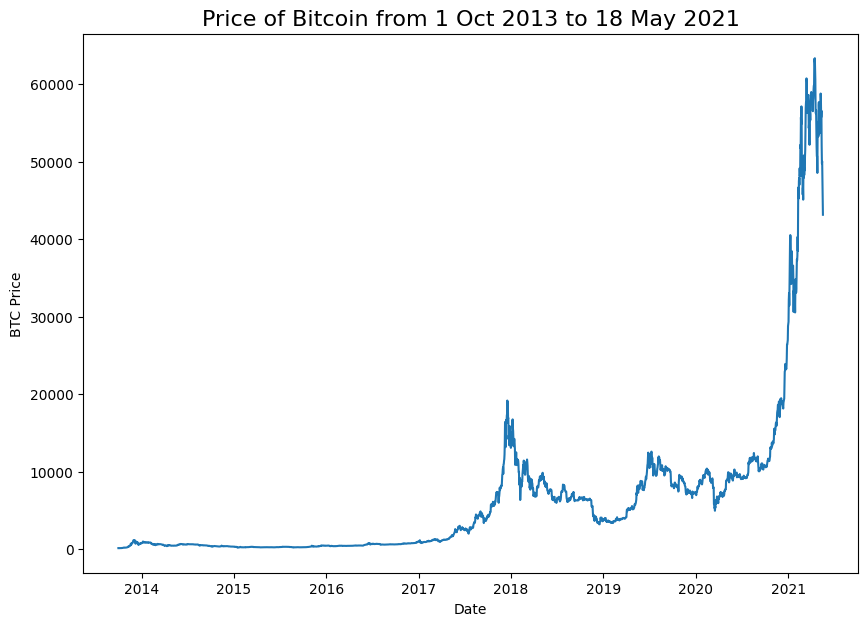

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [13]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(timesteps,
                                                       prices,
                                                       test_size=0.2,
                                                       random_state=42)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2229,), (558,), (2229,), (558,))

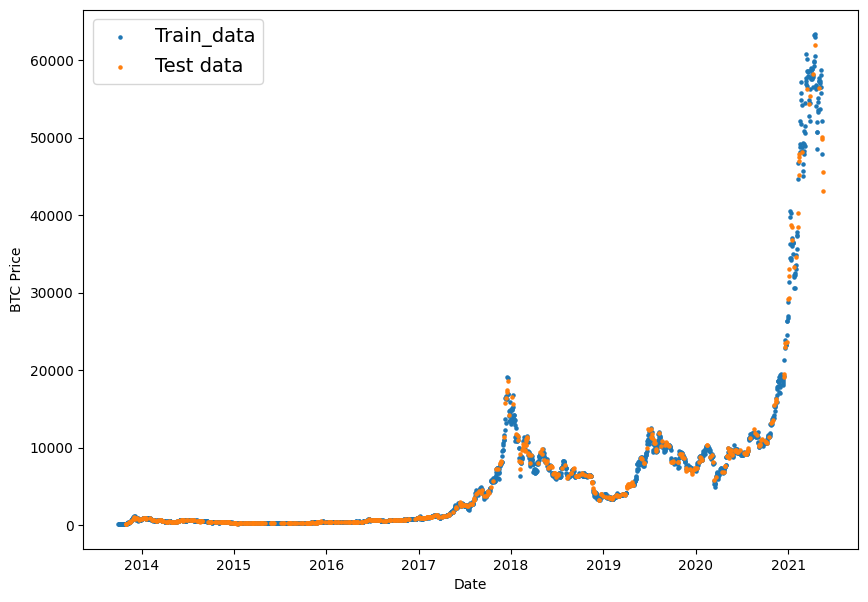

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train, s=5 , label="Train_data")
plt.scatter(x_test , y_test , s=5 , label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## creating data set fro time series

In [16]:
split_size = int(0.8 * len(prices))

x_train , y_train  =timesteps[:split_size] , prices[:split_size]

x_test , y_test = timesteps[split_size:] , prices[split_size:]

len(x_train), len(x_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

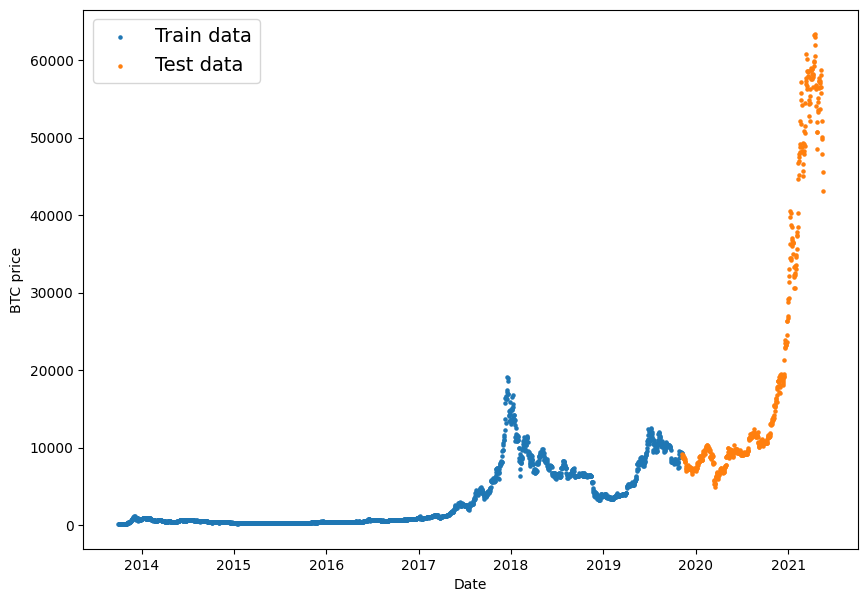

In [17]:
#plotting

plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train , s=5 , label="Train data")
plt.scatter(x_test , y_test , s=5 , label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show();

In [18]:
## Creating a plotting fucntion

def plot_time_series(timesteps , values , format='.' , start=0 , end=None , label=None):
  plt.plot(timesteps[start:end], values[start:end], format , label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

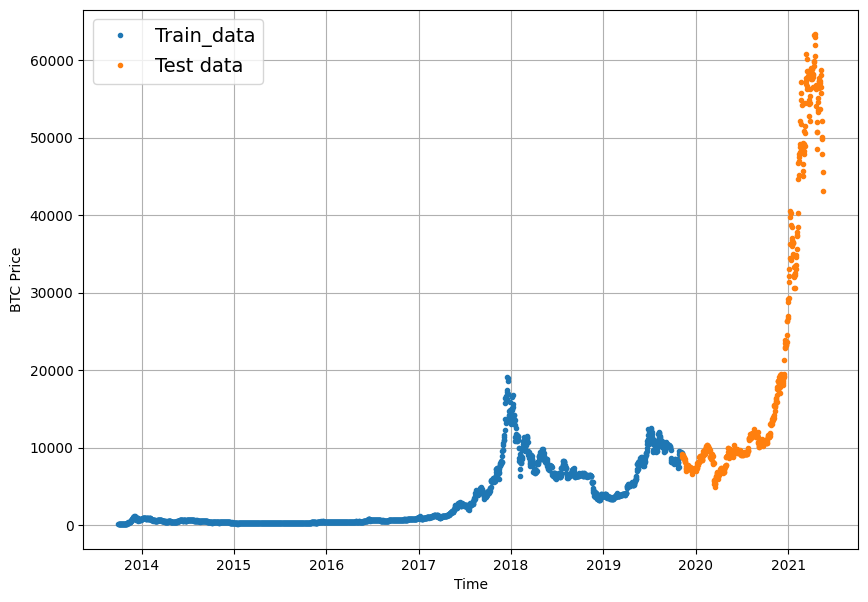

In [19]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train , values=y_train , label="Train_data")
plot_time_series(timesteps=x_test , values=y_test , label="Test data")

## Model 0 : Naive forecast (baseline)

In [20]:
naive_forecast = y_test[:-1]
naive_forecast[:10] , naive_forecast[-10:]


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

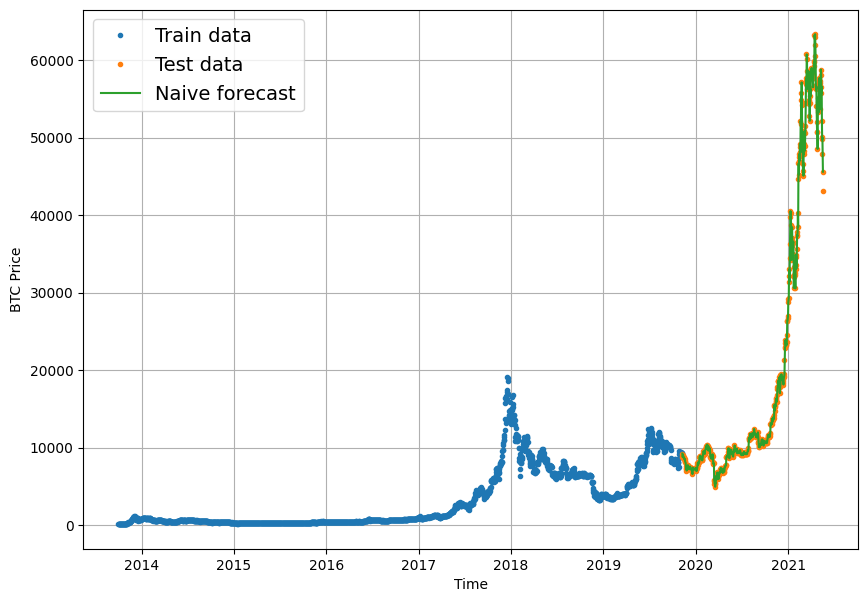

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train , values = y_train , label="Train data")
plot_time_series(timesteps=x_test , values=y_test , label ="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast , format="-" , label="Naive forecast");

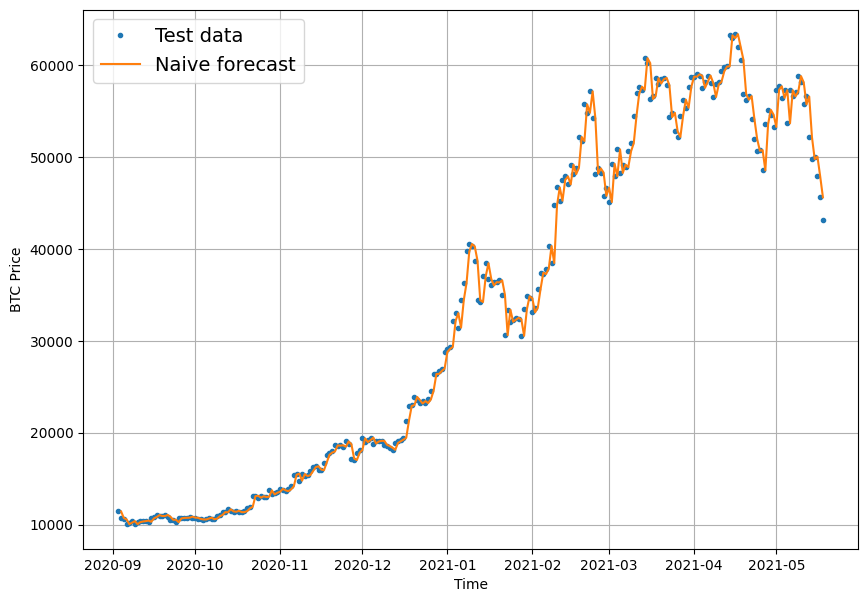

In [22]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [23]:
import tensorflow as tf

In [24]:
def mean_absolute_scaled_error(y_true , y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [25]:
def evaluate_preds(y_true , y_pred):

  y_true = tf.cast(y_true , dtype=tf.float32)
  y_pred  =tf.cast(y_pred , dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true , y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [27]:
# average price of bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

## Windowing dataset

In [28]:
horizon = 1
window_size = 7


In [29]:
def get_labelled_windows(x, horizon=1):

  return x[:, :-horizon] , x[: , -horizon:]

In [30]:
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0), horizon=horizon)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [31]:
# Create function to view NumP arrays as windows
def make_windows(x , window_size=7 , horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexs = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)) , axis=0).T
  windowed_array = x[window_indexs]
  windows, labels = get_labelled_windows(windowed_array , horizon=horizon)

  return windows , labels

In [32]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2780, 2780)

In [33]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [34]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [35]:
### Turning windows into training and test sets

def make_train_test_splits(windows , labels , test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows , test_windows , train_labels , test_labels

In [36]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(test_windows) ,len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [37]:
train_windows[:5] , train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
np.array_equal(np.squeeze(train_labels[:-horizon-1]), y_train[window_size:])

True

### Model checkpoint

In [39]:
# callback
import os
def create_model_checkpoint(model_name , save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose=0,
                                            save_best_only=True)

In [40]:
## Model 1: Dense model (window= 7 , horizon = 1)

import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(128),
    layers.Dense(horizon, activation="linear"),
] ,name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fitting the model

model_1.fit(x = train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 874.6113 - mae: 874.6113  

18/18 [==============================] - 10s 118ms/step - loss: 766.2955 - mae: 766.2955 - val_loss: 2235.7522 - val_mae: 2235.7522
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 245.6606 - mae: 245.6606

18/18 [==============================] - 1s 82ms/step - loss: 245.6606 - mae: 245.6606 - val_loss: 1070.8370 - val_mae: 1070.8370
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 183.2435 - mae: 183.2435

18/18 [==============================] - 1s 68ms/step - loss: 180.8595 - mae: 180.8595 - val_loss: 993.1981 - val_mae: 993.1981
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 187.0725 - mae: 187.0725

18/18 [==============================] - 1s 74ms/step - loss: 173.7293 - mae: 173.7293 - val_loss: 816.4005 - val_mae: 816.4005
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 157.3701 - mae: 157.3701

18/18 [==============================] - 1s 68ms/step - loss: 147.5774 - mae: 147.5774 - val_loss: 737.1850 - val_mae: 737.1850
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 132.8915 - mae: 132.8915 - val_loss: 1035.6808 - val_mae: 1035.6809
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 154.4215 - mae: 154.4215

18/18 [==============================] - 1s 86ms/step - loss: 146.5537 - mae: 146.5537 - val_loss: 684.9067 - val_mae: 684.9067
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 163.9760 - mae: 163.9760

18/18 [==============================] - 1s 53ms/step - loss: 159.8247 - mae: 159.8247 - val_loss: 642.0345 - val_mae: 642.0345
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 138.5163 - mae: 138.5163 - val_loss: 702.2368 - val_mae: 702.2368
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 122.7152 - mae: 122.7152 - val_loss: 944.1883 - val_mae: 944.1883
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 156.7191 - mae: 156.7191 - val_loss: 1214.5211 - val_mae: 1214.5211
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 160.8482 - mae: 160.8482 - val_loss: 660.2344 - val_mae: 660.2344
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0078 - mae: 121.0078 - val_loss: 703.0359 - val_mae: 703.0359
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 116.8589 - mae: 116.8589 - val_loss: 788.9892 - val_mae: 788.9892
Epoch 15/100
18/18 [===========

18/18 [==============================] - 1s 36ms/step - loss: 129.2926 - mae: 129.2926 - val_loss: 581.6701 - val_mae: 581.6701
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8686 - mae: 114.8686 - val_loss: 584.4920 - val_mae: 584.4920
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0591 - mae: 110.0591 - val_loss: 615.5352 - val_mae: 615.5352
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 115.0686 - mae: 115.0686

18/18 [==============================] - 1s 36ms/step - loss: 111.3782 - mae: 111.3782 - val_loss: 571.5275 - val_mae: 571.5275
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0251 - mae: 109.0251 - val_loss: 625.7218 - val_mae: 625.7218
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2597 - mae: 122.2597 - val_loss: 741.3652 - val_mae: 741.3652
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9826 - mae: 111.9826 - val_loss: 868.1456 - val_mae: 868.1456
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 136.3167 - mae: 136.3167 - val_loss: 939.3427 - val_mae: 939.3427
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 144.4654 - mae: 144.4654 - val_loss: 579.2610 - val_mae: 579.2610
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4144 - mae: 109.4144 - val_loss: 691.7589 - val_mae: 691.7589
Epoch 33/100
17/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 110.7720 - mae: 110.7720 - val_loss: 565.9442 - val_mae: 565.9442
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6121 - mae: 112.6121 - val_loss: 632.9864 - val_mae: 632.9864
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9330 - mae: 107.9330 - val_loss: 567.0814 - val_mae: 567.0814
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7310 - mae: 109.7310 - val_loss: 723.5229 - val_mae: 723.5229
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9777 - mae: 131.9777 - val_loss: 734.7395 - val_mae: 734.7395
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 125.9767 - mae: 125.9767 - val_loss: 710.8059 - val_mae: 710.8059
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8988 - mae: 124.8988 - val_loss: 675.2550 - val_mae: 675.2550
Epoch 40/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 112.6271 - mae: 112.6271 - val_loss: 565.4051 - val_mae: 565.4051
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6942 - mae: 109.6942 - val_loss: 829.0920 - val_mae: 829.0920
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9242 - mae: 118.9242 - val_loss: 606.8456 - val_mae: 606.8456
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0454 - mae: 106.0454 - val_loss: 647.9189 - val_mae: 647.9189
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 156.1094 - mae: 156.1094 - val_loss: 595.9077 - val_mae: 595.9077
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 130.3475 - mae: 130.3475 - val_loss: 1026.7607 - val_mae: 1026.7607
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 131.1177 - mae: 131.1177 - val_loss: 653.3174 - val_mae: 653.3174
Epoch 85/100
18/18 [==========

In [41]:
# Evaluate model on test data

model_1.evaluate(test_windows , test_labels)


18/18 [==============================] - 0s 3ms/step - loss: 581.0761 - mae: 581.0761


[581.0761108398438, 581.0761108398438]

In [42]:
# loading in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.4052 - mae: 565.4052


[565.4052124023438, 565.4052124023438]

In [43]:
## Making forecasts with a model (on the test dataset)

def make_preds(model , input_data):

  forecast =  model.predict(input_data)
  return tf.squeeze(forecast)

In [44]:
model_1_preds = make_preds(model_1 , test_windows)
len(model_1_preds) , model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8838.933, 8790.047, 9058.712, 8745.915, 8745.011, 8750.517,
        8682.844, 8524.346, 8461.286, 8543.095], dtype=float32)>)

In [45]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 565.40515,
 'mse': 1156143.0,
 'rmse': 1075.2408,
 'mape': 2.5660558,
 'mase': 0.99326026}

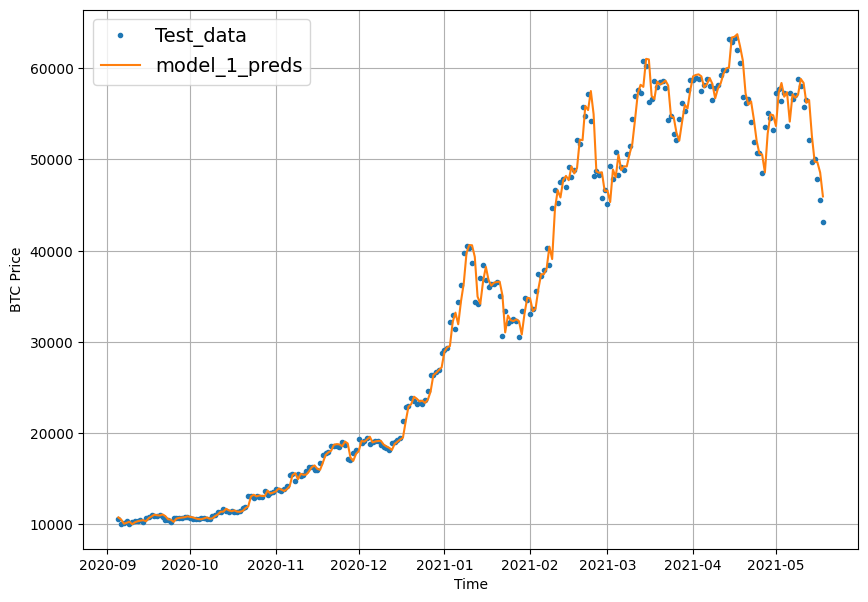

In [46]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps =  x_test[-len(test_windows):], values= test_labels[:,0], start=offset , label="Test_data")
plot_time_series(timesteps = x_test[-len(test_windows):], values= model_1_preds , start=offset , format="-" ,label="model_1_preds")


## Model 2: Dense (window = 30 , horizon = 1)

In [47]:
horizon = 1
window_size=30

In [48]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2757, 2757)

In [49]:
# Make train and testing windows
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows=full_windows , labels=full_labels)
len(train_windows) , len(test_windows) , len(train_labels) ,len(test_labels)

(2205, 552, 2205, 552)

In [50]:
# Deep learning model 2

model_2 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(horizon)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# fit a model

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [51]:
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 707.3594


707.359375

In [52]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows ,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 603.1541


603.1541137695312

In [53]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [54]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 603.1541,
 'mse': 1271703.5,
 'rmse': 1127.6984,
 'mape': 2.7431977,
 'mase': 1.0543193}

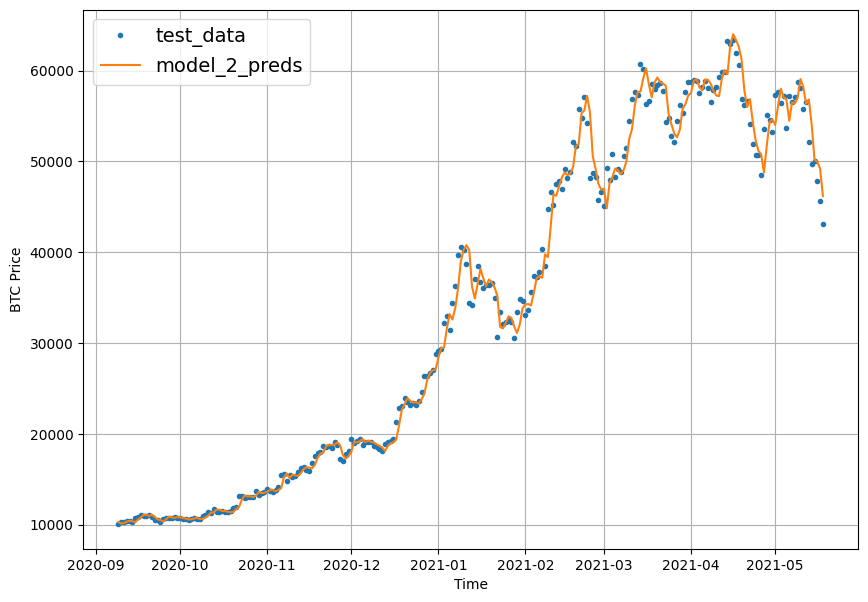

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30 , horizon=7)

In [56]:
horizon = 7
window_size = 30

In [57]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows),len(full_labels)

(2751, 2751)

In [58]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows=full_windows , labels=full_labels , test_split=0.2 )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [60]:
# building a model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(horizon)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [61]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1416.4011


1416.401123046875

In [62]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1259.8937


1259.8936767578125

In [63]:
# prediction are going to be 7 steps at a time (this is the horizon size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9219.73 , 9379.349, 9632.172, 9390.277, 9568.491, 9624.462,
        9549.41 ],
       [8900.742, 9266.969, 9299.469, 9146.589, 9145.095, 9488.462,
        9179.93 ],
       [8834.141, 9044.535, 9054.758, 8993.527, 8915.814, 9403.829,
        9084.841],
       [8904.795, 9101.231, 9034.922, 9000.064, 9162.099, 9257.469,
        9181.657],
       [8787.255, 8866.533, 8874.981, 9004.27 , 9123.134, 9056.156,
        8910.762]], dtype=float32)>

In [64]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'mae': array([  687.34094 ,   452.63785 ,   413.6469  ,   465.1536  ,
          391.80804 ,   439.9183  ,   489.90277 ,   547.7612  ,
          512.14056 ,   764.6952  ,   800.26373 ,   726.1027  ,
          833.7191  ,   832.6784  ,   720.7454  ,   383.39175 ,
          238.70682 ,   144.39265 ,   181.79533 ,   169.97057 ,
          192.80008 ,   260.07443 ,   463.2036  ,   378.2775  ,
          277.952   ,   306.9744  ,   145.05315 ,   125.35191 ,
          194.11537 ,   312.93478 ,   328.15707 ,   456.3182  ,
          446.0521  ,   404.21576 ,   372.3771  ,   373.74142 ,
          397.32156 ,   269.32407 ,   289.17725 ,   149.27916 ,
          309.4804  ,    28.956333,    86.9142  ,    61.652554,
           78.116005,   168.05518 ,    63.25286 ,   203.82088 ,
          137.02574 ,   159.59445 ,   200.12437 ,   174.19775 ,
          170.04039 ,   233.92822 ,   230.88797 ,   276.18988 ,
          402.70523 ,   426.65262 ,   493.02615 ,   514.371   ,
          411.18436 ,   175.57039

In [67]:
### evaluation function work for larger horizons

def evaluate_preds(y_true , y_pred):

  y_true = tf.cast(y_true , dtype=tf.float32)
  y_pred = tf.cast(y_pred , dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true ,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [68]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1259.8938,
 'mse': 5518155.0,
 'rmse': 1444.5724,
 'mape': 5.7106533,
 'mase': 2.2419105}

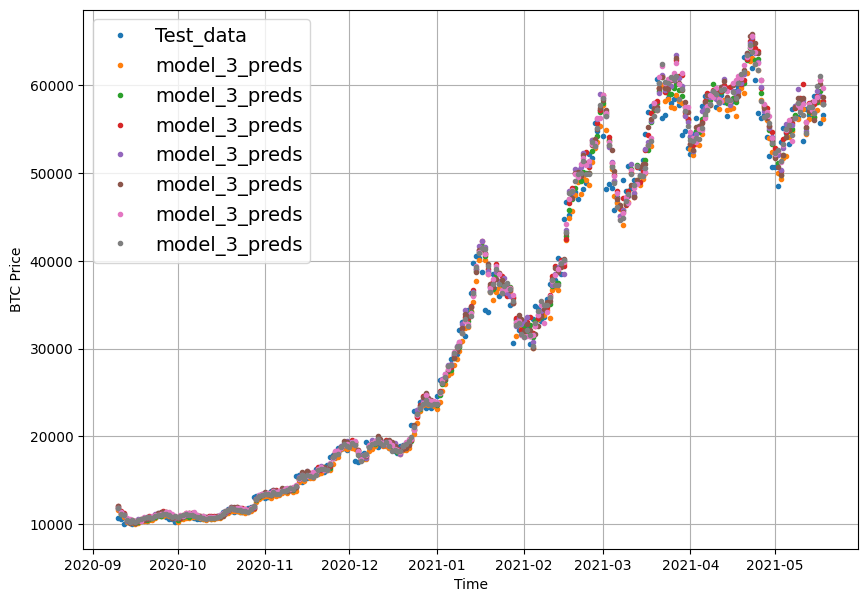

In [69]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=x_test[-len(test_windows):] , values=test_labels[: , 0], start=offset ,label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):] , values=model_3_preds , start=offset ,label ="model_3_preds")

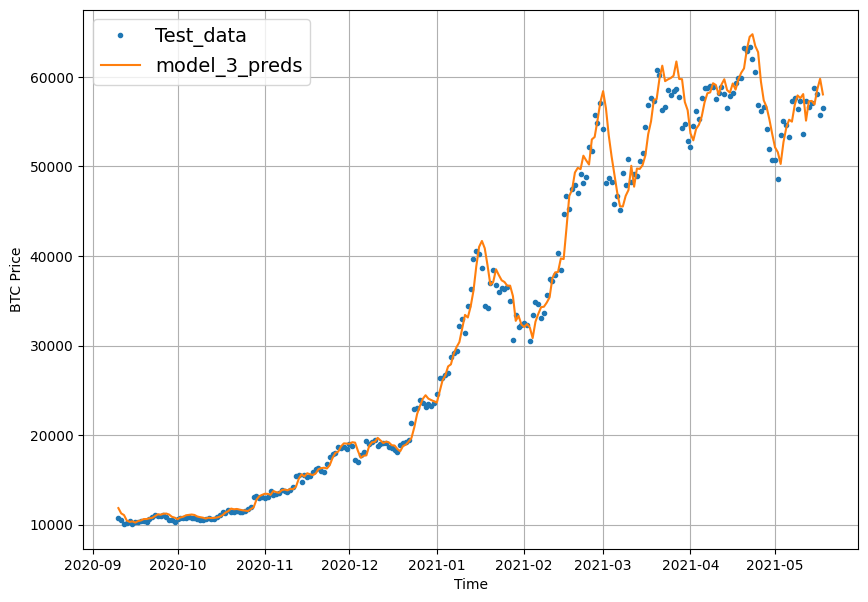

In [71]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

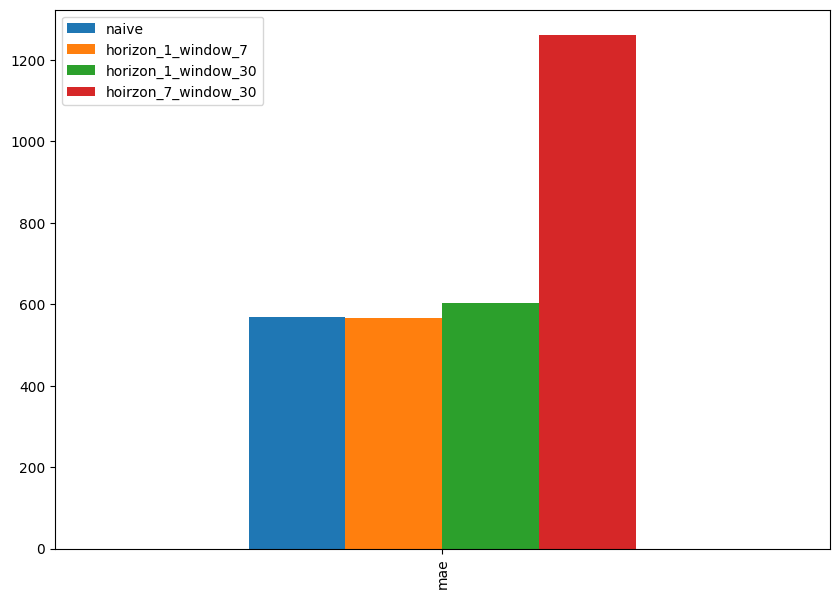

In [72]:
### comparing other all model till now

pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "hoirzon_7_window_30": model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7), kind="bar");

#### here we can see that naive and model 1 performing approx same

## Model 4: Conv1D

In [73]:
horizon = 1
window_size = 7

full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2780, 2780)

In [74]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(test_windows) ,len(train_labels) ,len(test_labels)

(2224, 556, 2224, 556)

In [75]:
# check data sample shapes

train_windows[0].shape

(7,)

In [77]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expand shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded  shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expand shape: (7, 1)
Original values with expanded  shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [79]:
# building a model

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128 , kernel_size=5 , padding="causal" , activation="relu"),
    layers.Dense(horizon)
] , name="model_4_conv1D")

# compile

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [84]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 577.9833


577.9832763671875

In [85]:
model_4_preds = make_preds(model_4 , test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8875.497, 8785.173, 8961.526, 8746.041, 8735.135, 8712.154,
       8644.812, 8525.612, 8439.898, 8488.48 ], dtype=float32)>

In [86]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 577.9832,
 'mse': 1199590.8,
 'rmse': 1095.2583,
 'mape': 2.5900524,
 'mase': 1.0153564}

## Model 5 :RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size))
x= layers.Lambda(lambda x: tf.expand_dims(x , axis=1))(inputs)
